### [통계계산]
- Q: x^2 -x -5의 근을 어떻게 구할 수 있을까?

- 교수님께서 말씀해주신 알고리즘은 이진탐색법이다. 

# 이차방정식
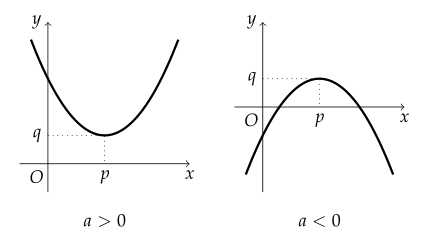

In [ ]:
#이차방정식은 아래로 해결가능하다.
def function(x):
    return x**2 -x -6 # 정답은 3과 -2다
    #return x*3-8 #정답은 2이다

def Quadratic_search(left,right):
    mid = (left + right)/2
    result = function(mid)
    
    if abs(result) < error:
        print("x = {}, f(x) = {}".format(round(mid,2),round(result,2)))
        print()
        return
    # f(a) * f(b) <0 근이 존재한다고 가정하자.
    if result * function(right) < 0:
        Quadratic_search(mid,right)
    
    if function(left) * result < 0:
        Quadratic_search(left,mid)

# 왼쪽 오른쪽
left = -1e9
right = 1e9
error = 0.00001

Quadratic_search(left,right)

# 삼차방정식


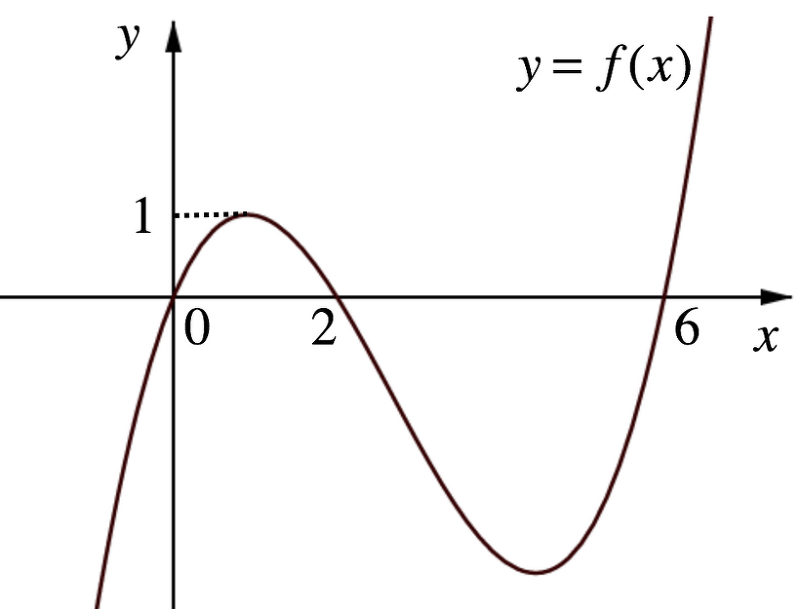

In [ ]:
def function(x):
    return 3*x**3 + 2*x**2 -7*x +2

def Quadratic_search(left,right):
    mid = (left + right)/2
    result = function(mid)
    
    if abs(result) < error:
        print("x = {}, f(x) = {}".format(round(mid,2),round(result,2)))
        print()
        return
    # f(a) * f(b) <0 근이 존재한다고 가정하자.
    if result * function(right) < 0:
        Quadratic_search(mid,right)
    
    if function(left) * result < 0:
        Quadratic_search(left,mid)

In [ ]:
#삼차에서는 
from sympy import Derivative, symbols, solve

#기호화
x = symbols('x')

#함수, 도함수
fx =  3*x**3 + 2*x**2 -7*x +2 #정답은 1, -2, 1/3
fprime = Derivative(fx,x).doit()
Extreme_value = solve(fprime)
    
# 왼쪽 오른쪽
left = -1e9
right = 1e9
error = 0.00001

#풀이
if len(Extreme_value) == 2 and Extreme_value[0]*Extreme_value[1] < 0:
    Quadratic_search(Extreme_value[0],Extreme_value[1])

for value in Extreme_value:
    value = round(value,2)
    if fx.subs({x:value}) * fx.subs({x:left}) < 0:
        Quadratic_search(left,value)
    if fx.subs({x:value}) * fx.subs({x:right}) < 0:
        Quadratic_search(value,right)

# 2주차 금요일 숙제

In [24]:
# 1) bisection method
# continuous 해야함
# 한번에 하나밖에 못찾는 다는 단점이 있음.

import math

def equation(x):
    return x - math.exp(-x/2 +1) + x**2

def solve(left,right,cnt):
    mid = (left + right)/2
    value = equation(mid)
    if abs(value) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(mid,value,cnt))
        return
    if equation(left) * value < 0:
        solve(left,mid,cnt+1)
    if value * equation(right) < 0:
        solve(mid,right,cnt+1)


left, right = -10, 50
error = 0.0001
solve(left,right,0)

x = 0.9063339233398438, f(x) = 2.549152054776016e-06, cnt = 18


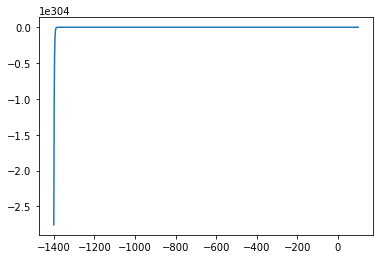

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1400,100)
y = np.array(list(map(equation,x)))
plt.plot(x,y)

# Secant method

<br>

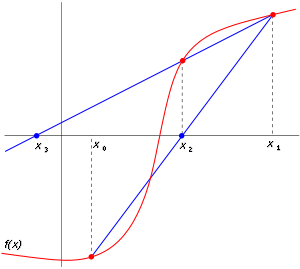

In [18]:
# secant method
# 일차함수 y = ax + b를 이용한다.
import math
def equation(x):
    return x - math.exp(-x/2 + 1) + x**2

def solve(left,right,cnt):
    mid = right - equation(right)*(right - left)/(equation(right) - equation(left))
    if abs(equation(mid)) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(mid, equation(mid),cnt))
        return
    else:
        solve(right,mid,cnt+1) #조심하기 x0 --> x1 --> x2 순이기 때문에 right가 왼쪽으로 옴.

left, right = -10, 50 # 정의역의 범위 잡는게 중요하다.
error = 1e-7

solve(left,right,0)


x = 0.9063332307383855, f(x) = 2.765682904914968e-09, cnt = 6


# False Postition

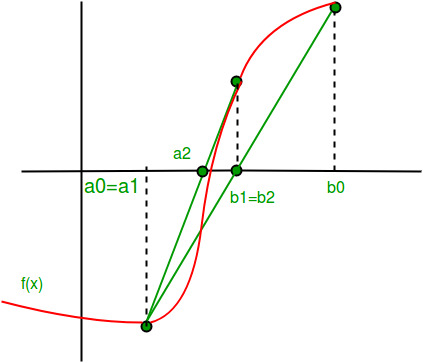

In [15]:
# False Postition
# 일차함수 y = ax + b를 이용한다.

import math

x = []
y = []
def equation(x):
    return x - math.exp(-x/2 + 1) + x**2

def solve(left,right,cnt):
    mid = right - equation(right)*(left - right)/(equation(left) - equation(right))
    x.append(mid)
    y.append(equation(mid))
    if abs(equation(mid)) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(mid, equation(mid),cnt))
        return
    
    # left(X0)와 mid(X2)의 함숫값을 곱한 부호가 다르면 right을 가운데로 옮겨준다.
    if equation(mid) * equation(left) < 0:
        right = mid
    # left
    else:
        left = mid 
    solve(left,right,cnt+1)

left, right = -10,20 # 정의역 범위 잡는게 중요하네
error = 1e-7

solve(left,right,0)


x = 0.9063332539120998, f(x) = 8.7965073447549e-08, cnt = 129


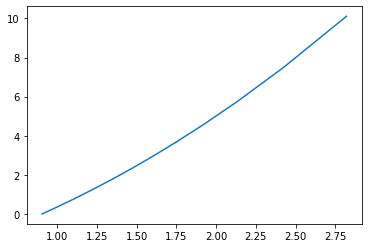

In [16]:
import matplotlib.pyplot as plt
plt.plot(x,y)

# Newton method
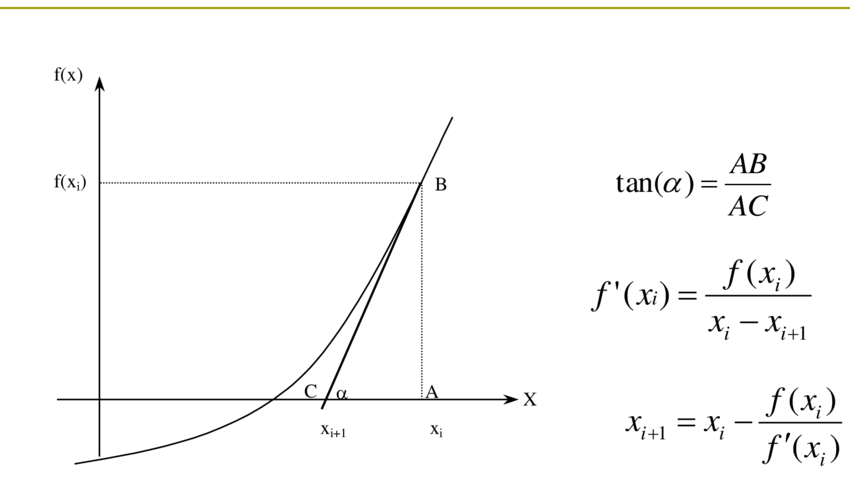

In [12]:
#방법1 while문
import sympy
from sympy import symbols, Derivative

#기호화
x = symbols('x')

#함수, 도함수
fx = x - sympy.exp(-x/2 + 1) + x**2
fprime = Derivative(fx,x).doit()

old = -100
error = 1e-7
cnt = 0

while True:
    new = float(old) - float(fx.subs({x:old}))/float(fprime.subs({x:old}))
    result = fx.subs({x:new})
    if abs(result) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(new, result ,cnt))
        break
    old = new
    cnt += 1



x = 0.9063332476973824, f(x) = 6.51163352127782E-8, cnt = 54


In [17]:
#방법2 리커시브
#함수, 도함수
fx = x - sympy.exp(-x/2 + 1) + x**2
fprime = Derivative(fx,x).doit()

def solve(now, cnt):
    new = float(now) - float(fx.subs({x:now}))/float(fprime.subs({x:now}))
    result = fx.subs({x:new})
    # f(x+1)이 error에 가깝다면.
    if abs(result) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(new, result ,cnt))
        return
    else:
        solve(new,cnt+1)

error = 1e-7
solve(-100,0)


x = 0.9063332476973824, f(x) = 6.51163352127782E-8, cnt = 54


In [8]:
#참고자료
import sympy as sp
x = sp.symbols('x')

#함수와 도함수
f_x = x - sympy.exp(-x/2 + 1) + x**2
fp_x = sp.diff(f_x)

# 초깃값, error
x_init = 5
error = 1e-7

#카운트와 temp
cnt = 0
x_tmp = x_init
while True:
    cnt += 1
    x_numeric = float(x_tmp) - float(f_x.subs(x,x_tmp))/float(fp_x.subs(x,x_tmp))
    result = f_x.subs(x, x_numeric)
    if abs(result) <= error:
        print("x = {}, f(x) = {}, cnt = {}".format(x_numeric, result ,cnt))
        break
    else:
        x_tmp = x_numeric

x = 0.9063332305748152, f(x) = 2.16430828814396E-9, cnt = 5


# Fixed point

In [41]:
import sympy as sp
x = sp.symbols('x')

f_x = x - sympy.exp(-x/2 + 1) + x**2
fp_x = sp.diff(f_x)

def fixed_point(point,cnt):
    print(point)
    #함숫값
    value = float(f_x.subs(x,point))
    if abs(value) < error:
        print("x = {}, f(x) = {}, cnt = {}".format(point, value ,cnt))
    else:
        fixed_point(value,cnt+1)

start = 0.90633
fixed_point(start,0)
    


0.90633
x = 0.90633, f(x) = -1.1875207159617318e-05, cnt = 0


# 정리



## 1) binary 
- 양쪽 끝 값을 잡은 다음에, mid값을 변동시킴
- binary search 알고리즘과 동일

## 2) secant mathod
- binary search 알고리즘에서
- y = ax+b를 이용


## 3) false mathod
- secant method의 improve version
- f(x_2) * f(x_0) < 0 (부호가 다르다면) 
    x_1 = x_2
  else:
     x_0 = x_2

### 4) newthon method
- 순간변화율을 이용해서, 한점에서 움직임

### 5) fixed method
- 한 점을 이용함
- x --> f(x) <br>
  f(x) --> f(f(x)) 형태로 계속 움직임

구체적인 비교는 안해봤지만,
두 점을 이용할 때는, secant이고
한 점을 이용할 때는, newthon